In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.cluster.hierarchy as hac
%matplotlib inline

In [2]:
train = pd.read_csv('train_1.csv').fillna(0)
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col], downcast='float')

In [3]:
train.to_csv('train_1_1.csv')

In [221]:
train_data = train.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [222]:
test_data.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
# pages without views will be set in one cluster
zero_train = test_data[train_data.mean(numeric_only=True, axis=1) == 0]
# all other pages will be clusterized
non_zero_train = train_data[train_data.mean(numeric_only=True, axis=1) != 0]

In [ ]:
# adding new features which will be used for clusterization: skewness and VMR
non_zero_train['skew'] = non_zero_train.skew(numeric_only=True, axis = 1)
non_zero_train['VMR'] = non_zero_train.iloc[:,:-1].var(numeric_only=True, axis = 1)/non_zero_train.iloc[:,:-1].mean(numeric_only=True, axis=1)

In [ ]:
#check that zero rows output
non_zero_train[test_data.iloc[:,:-2].mean(numeric_only=True, axis=1) == 0]

In [ ]:
#normalize skew and VMR
non_zero_train.iloc[:,-2:] = scaler.fit_transform(non_zero_train.iloc[:,-2:])

In [ ]:
#checking that normalized
non_zero_train.head()

# AFTER clusterization!!! Vizualization if needed (not necessary to execute)

/Users/andreyponikar/anaconda3/envs/aind-dog/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/andreyponikar/anaconda3/envs/aind-dog/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([ 44827.,   9768.,   6895.,   5286.,   4351.,   3654.,   3165.,
          2722.,   2422.,   2138.]),
 array([    1. ,   100.9,   200.8,   300.7,   400.6,   500.5,   600.4,
          700.3,   800.2,   900.1,  1000. ]),
 <a list of 10 Patch objects>)

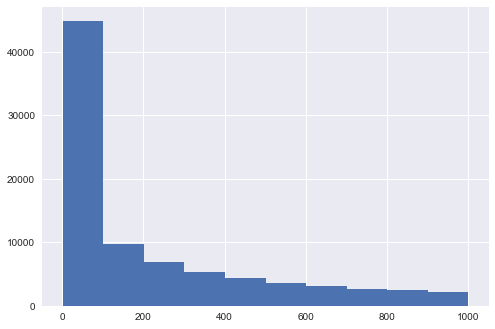

In [653]:
plt.hist(non_zero_train['VMR'], range = (1, 1000))

(array([  5.99980000e+04,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([        0. ,   1945128.3,   3890256.6,   5835384.9,   7780513.2,
          9725641.5,  11670769.8,  13615898.1,  15561026.4,  17506154.7,
         19451283. ]),
 <a list of 10 Patch objects>)

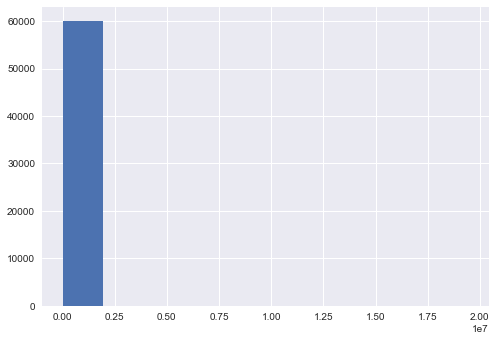

In [486]:
plt.hist(non_zero_train.median(numeric_only=True, axis=1))

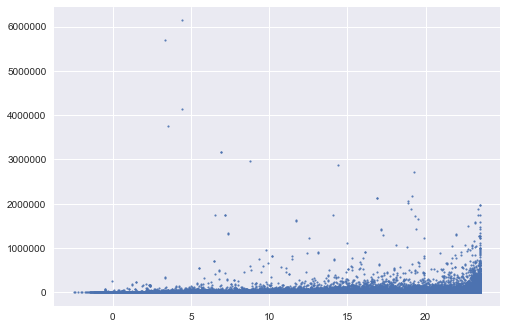

In [656]:
plt.scatter(non_zero_train['skew'], non_zero_train['VMR'], s = 3, alpha=0.9)

In [574]:
non_zero_train.iloc[:,-3:].as_matrix()

array([[  1.65862676e-01,  -1.48128921e-02,  -1.53899220e-01],
       [  4.02676671e-01,  -1.48016104e-02,  -1.53809874e-01],
       [  5.43241074e-01,  -1.49482729e-02,  -1.53971093e-01],
       ..., 
       [ -1.06601244e+00,   4.71802176e-02,  -1.47087981e-01],
       [ -3.79776600e-01,   3.66676428e-04,   1.13335875e-01],
       [ -5.80024594e-01,  -4.34908696e-03,  -1.46404540e-01]])

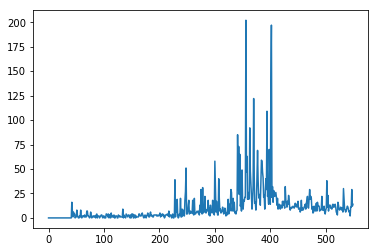

In [141]:
cluster_4 = train[train['cluster'] == 4].iloc[:,1:-1]
plt.plot(np.arange(550),cluster_4.iloc[11:12,:].T)
#id =134
#plt.plot(np.arange(550),train.iloc[id:id+1,1:-1].T)

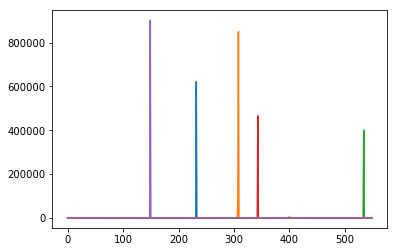

In [143]:
cluster_9 = train[train['cluster'] == 2].iloc[:,1:-1]
plt.plot(np.arange(550),cluster_9.iloc[0:5,:].T)

# Clusterize

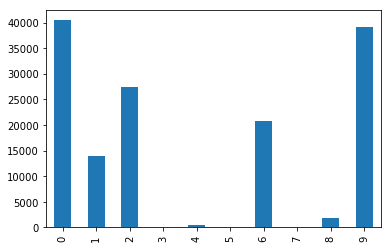

In [201]:
from sklearn import cluster
# Convert DataFrame to matrix
n_clusters = 10
mat = non_zero_train.iloc[:,-2:].as_matrix()
# Using sklearn to clusterize
km = cluster.KMeans(n_clusters=n_clusters,max_iter=1000, n_init = 100)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
clusters = pd.DataFrame([non_zero_train.index,labels]).T
# Vizualize clisters
vc = clusters[1].value_counts().sort_index()
ax = vc.plot(kind='bar')
fig = ax.get_figure()

In [203]:
clusters.columns = ['id', 'cluster']
clusters = clusters.set_index(['id'])

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [205]:
# add zero cluster data
zero_cluster = pd.DataFrame(zero_train.index.values)
zero_cluster['cluster'] = n_clusters + 1
zero_cluster.columns = ['id', 'cluster']
zero_cluster = zero_cluster.set_index(['id'])
clusters = clusters.append(zero_results)
clusters = clusters.sort()

In [217]:
train['cluster'] = clusters['cluster']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,cluster
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,2
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,2
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,2
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,9
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,2


In [218]:
results.to_csv("clusters_skew_VMR.csv")
train.to_csv('train_1_clustered.csv')

# Prerare data

In [57]:
# and window-size into a set of input/output pairs for use with our RNN model
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    for i in range(0, len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size:i + window_size + 1])
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return X,y

In [147]:
results = pd.read_csv("clusters_skew_VMR.csv")
results.head()
#clusters = results.iloc[:,-1:].drop_duplicates()['cluster'].tolist()

,Unnamed: 0,id,cluster
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,4
4,4,4,0


In [28]:
results[results['cluster'] == clusters[0]]['id'].as_matrix()

array([     0,      1,      2, ..., 145053, 145056, 145058])

In [53]:
len(train.iloc[0:1, 1:-1].as_matrix().squeeze())

550

In [89]:
x2, Y2 = window_transform_series(train.iloc[1:2, 1:-1].as_matrix().squeeze(), 60)
print(Y2.shape)
x_total = np.zeros(x2.shape)
print(x_total.shape)

(490, 1)
(490, 60)


In [103]:
window_size = 60
train_sorted =  train.sort(['cluster'])

x_total = np.array([], dtype=np.int64).reshape(0,window_size)
Y_total = np.array([], dtype=np.int64).reshape(0,1)
i = 0
for index, row in train_sorted[train_sorted['cluster'] == 11].iloc[:, 1:-1].iterrows():
    i += 1
    if (i % 50 == 0):
        print(i)
    x, Y = window_transform_series(row, window_size)
    x_total = np.concatenate((x_total,x))
    Y_total = np.concatenate((Y_total,Y))
print(x_total.shape)
print(Y_total.shape)

/Users/andreyponikar/anaconda3/envs/aind-dog/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
(368480, 60)
(368480, 1)


In [104]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(Y_total)/float(3)))   # set the split point

# partition the training set
X_train = x_total[:train_test_split,:]
y_train = Y_total[:train_test_split]

# keep the last chunk for testing
X_test = x_total[train_test_split:,:]
y_test = Y_total[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)

model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_absolute_error', optimizer=optimizer)

In [106]:
# run your model!
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
 60600/245654 [======>.......................] - ETA: 1076s - loss: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))